In [5]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [7]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
from matplotlib import pyplot as plt

import requests
matplotlib.rcParams["font.size"] = 12

### IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris
- This set of data is used in beginning Machine Learning Courses
- You can train a ML algorithm to use the values to predict the class of iris
- Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [3]:
# Warmup 1:  Requests and file writing

# use requests to get this file  "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# check that the request was successful
response.raise_for_status()

# open a file called "iris.csv" for writing the data locally to avoid spamming their server
file_obj = open("iris.csv", "w")

# write the text of response to the file object
file_obj.write(response.text)

# close the file object
file_obj.close()

# look in your Jupyter Notebook parent tab to see the file
# what's wrong with the file? 

In [5]:
# Warmup 2:  Making a DataFrame

# read the "iris.csv" file into a Pandas dataframe
iris_df = pd.read_csv("iris.csv")

# display the head of the data frame
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [30]:
# Warmup 3:  our CSV file has no header....let's add column names

# use this list: ["sep-len", "sep-wid", "pet-len", "pet-width", "class"]
# using the info from the web site: 
# Attribute Information:

# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class: Iris Setosa, Iris Versicolour, Iris Virginica


iris_df = pd.read_csv("iris.csv",
                 names=["sep-len", "sep-wid", "pet-len", "pet-width", "class"])
iris_df.head()

,sep-len,sep-wid,pet-len,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Lecture 36:  Scatter Plots
**Learning Objectives**
- Set the marker, color, and size of scatter plot data
- Calculate correlation between DataFrame columns
- Use subplots to group scatterplot data

## Set the marker, color, and size of scatter plot data

To start, let's look at some made-up data about Trees.
The city of Madison maintains a database of all the trees they care for.

In [31]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees_df = DataFrame(trees)
trees_df.head()

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5


### Basic scatter plot
<pre>
x= , y= ,  color=
the name of the column selects the data and is used as the axis label

<AxesSubplot:xlabel='age', ylabel='height'>

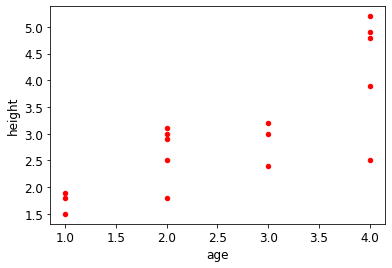

In [32]:

trees_df.plot.scatter(x="age", y="height", color = 'r')  # TODO: change y to diameter

In [33]:
# TODO: plot height vs diameter, with a different color
trees_df

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5
5,2,3.0,1.8
6,2,2.9,1.7
7,3,3.2,2.1
8,3,3.0,2.0
9,3,2.4,2.2


### Selecting a marker and a size 
<pre>
marker=' '       fun choices!
size as int (s=10)

<AxesSubplot:xlabel='age', ylabel='height'>

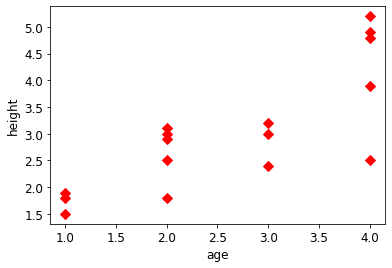

In [34]:
# https://matplotlib.org/stable/api/markers_api.html 
trees_df.plot.scatter(x="age", y="height", color="r",  marker = "D", s=50) # D for diamond

### The Size can be a data value
but you may want to multiply or divide its value so it looks good

<AxesSubplot:xlabel='age', ylabel='height'>

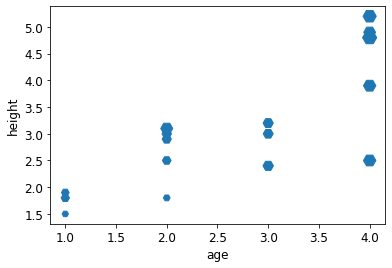

In [35]:
#Option 1:
#trees_df.plot.scatter(x="age", y="height",  marker="H", s="diameter")

#Option 2:
trees_df.plot.scatter(x="age", y="height", marker = "H", s=trees_df["diameter"] * 50) # this way allows you to make it bigger

## Calculate correlation between DataFrame columns
https://www.w3schools.com/python/pandas/pandas_correlations.asp

In [36]:
# What is the correlation between our DataFrame columns?
corr_df = trees_df.corr()
corr_df

,age,height,diameter
age,1.000000,0.797468,0.854578
height,0.797468,1.000000,0.839345
diameter,0.854578,0.839345,1.000000


In [37]:
# What is the correlation between age and height (don't use .iloc)
corr_df['age']['height']

0.7974683544303798

Index(['age', 'height', 'diameter'], dtype='object')
age <class 'str'>
height <class 'str'>
diameter <class 'str'>


(0.8545784523255622, 'diameter')

## Use subplots to group scatterplot data

### Let's take the Iris data and make a cool Scatter Plot


In [29]:
iris_df

NameError: name 'iris_df' is not defined

### How do we create a *scatter plot* for various *class types*?

In [51]:
# make a set called classes that contains the unique values in the "class" column
classes = set(iris_df["class"]) # unique values of this column
classes

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

<AxesSubplot:xlabel='pet-width', ylabel='pet-len'>

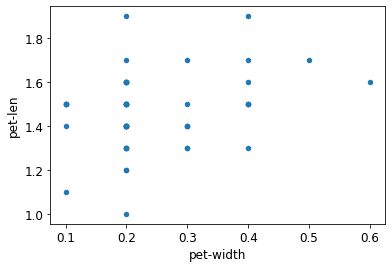

In [52]:
# change this scatter plot so that the data is only for class ='Iris-setosa'
iris_df[iris_df["class"] == 'Iris-setosa'].plot.scatter(x = "pet-width", y = "pet-len")

Iris-virginica
Iris-setosa
Iris-versicolor


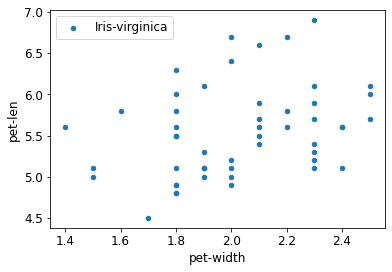

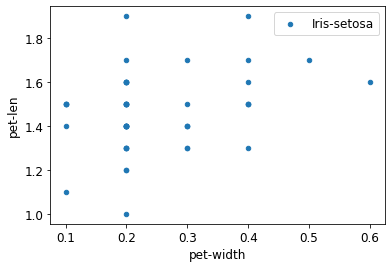

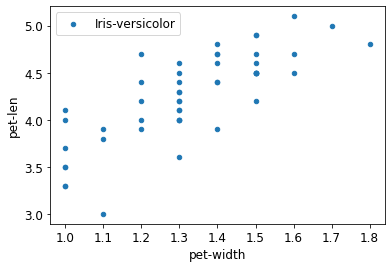

In [53]:
# write a for loop that iterates through each variety in classes
# and makes a plot for only that class

for variety in classes:
    # print variety
    print(variety)
    # make a df just of just the data for this variety
    sub_df = iris_df[iris_df["class"] == variety] 
    
    #make a scatter plot for this variety
    sub_df.plot.scatter(x = "pet-width", y = "pet-len", label=variety)

Iris-virginica
Iris-setosa
Iris-versicolor


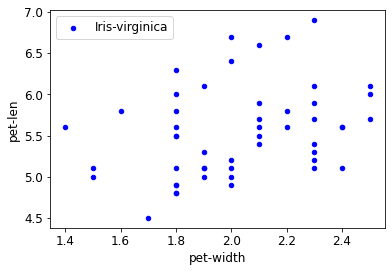

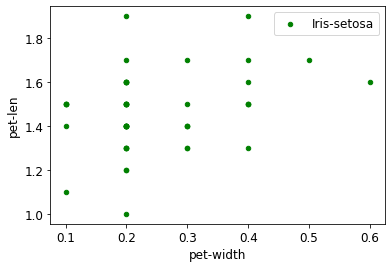

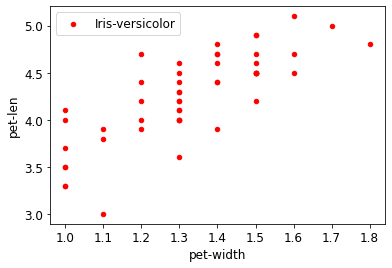

In [54]:
# copy/paste the code above, but this time make each plot a different color
colors = ["blue", "green", "red"]
for variety in classes:
    print(variety)
    sub_df = iris_df[iris_df["class"] == variety] 
    sub_df.plot.scatter(x = "pet-width", y = "pet-len", label=variety, 
                        color = colors.pop(0)) # nifty way to iterate through colors


In [55]:
# Did you notice that it made 3 plots ?!?!
# Let's try to put 3 plots together into a single plot!

### We can make Subplots in plots, called an AxesSubplot, keyword ax
1. if AxesSuplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used

Iris-setosa None
Iris-virginica AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor AxesSubplot(0.125,0.125;0.775x0.755)


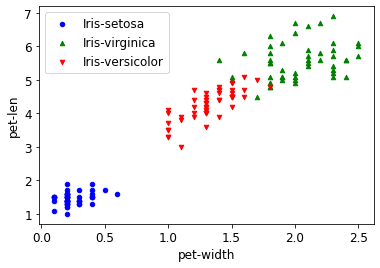

In [17]:
# complete this code to make 3 plots in one

plot_area = None   # don't change this...look at this variable in line 12
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for variety in classes:
    sub_df = iris_df[iris_df["class"] == variety]  # make a subset DataFrame
    print(variety, plot_area)
    plot_area = sub_df.plot.scatter(x="pet-width", y="pet-len",
                                    color=colors.pop(0),    
                                    label=variety,          
                                    ax=plot_area,           # first ax=None, then ax=the most recent plot
                                    marker=markers.pop(0))  # see colors.pop(0)

### How do we control the *axes range* of values?
### Let us consider plotting just the data for class "Iris-virginica"
### How to extract data just for "Iris-virginica"?

In [47]:
df_sub = df[df["class"] == "Iris-virginica"]
# how do we know we got the correct number of rows?
assert(len(df_sub) == 50)
df_sub.head()

,sep-len,sep-wid,pet-len,pet-wid,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

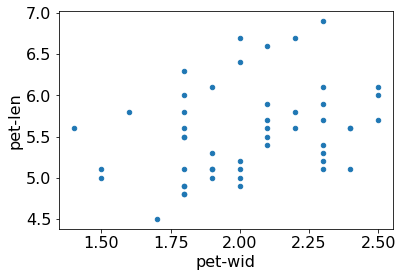

In [48]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len")

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

<AxesSubplot:xlabel='pet-wid', ylabel='pet-len'>

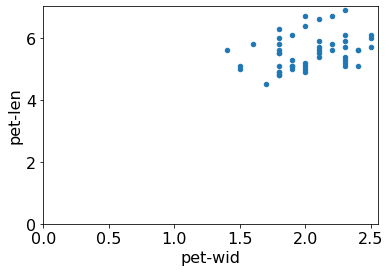

In [49]:
df_sub.plot.scatter(x = "pet-wid", y = "pet-len", xlim = 0, ylim = 0)

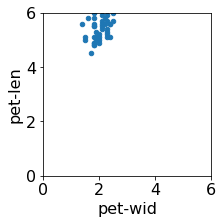

In [50]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                    xlim = (0, 6), ylim = (0, 6),
                    figsize = (3, 3))
# what's wrong with this picture? 

In [56]:
#df_sub["pet-len"].max()
df_sub["pet-wid"].max()

2.5

In [55]:
#ax.get_ylim()
ax.get_xlim()

(0.0, 6.0)

Let's include assert statements to make sure we don't crop the plot!

AssertionError: 

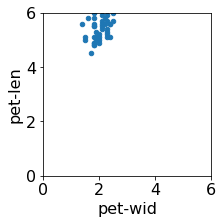

In [57]:
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))
assert df_sub["pet-len"].max() <= ax.get_ylim()[1]

### Now let's try all 4 assert statements

- assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
- assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
- assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
- assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]

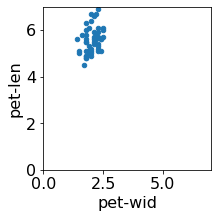

In [58]:
# note that we fixed the ylim and changed xlim to look good
ax = df_sub.plot.scatter(x = "pet-wid", y = "pet-len",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))
assert df_sub[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert df_sub[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert df_sub[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert df_sub[ax.get_ylabel()].max() <= ax.get_ylim()[1]